# Multi-dimnesional models

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-5, 5, 0.02)
y = np.arange(-1, 1, 0.005)
X, Y = np.meshgrid(x, y)

w = [1.3598, 0.4589, 2.495, -0.0234]
Z = w[0] + w[1] * X + w[2] * Y + w[3] * X * Y + np.random.normal(0, 1.2, size=X.shape)
Ze = np.ones_like(Z) * 1.2

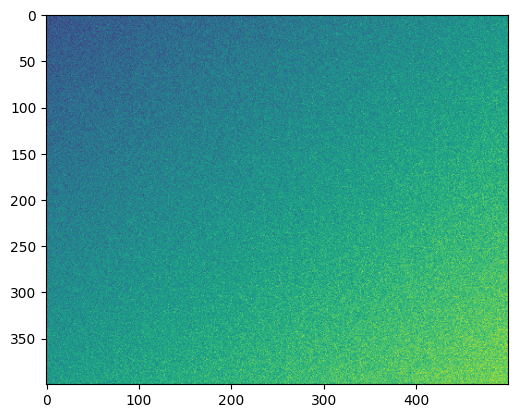

In [3]:
plt.imshow(Z)

In [4]:
from lamatrix import Polynomial, Constant

In [5]:
px = Constant() + Polynomial('X', order=1)
py = Constant() + Polynomial('Y', order=1)

In [9]:
model = py * px

In [10]:
from lamatrix import CrosstermModel

In [11]:
CrosstermModel(px, py)

CrosstermModel(Y, X)[n, 4]

In [12]:
model

JointModel
	Constant()[n, 1]
	Polynomial(X)[n, 1]
	Polynomial(Y)[n, 1]
	CrosstermModel(Y, X)[n, 1]

In [13]:
model.fit(X=X, Y=Y, data=Z, errors=Ze)

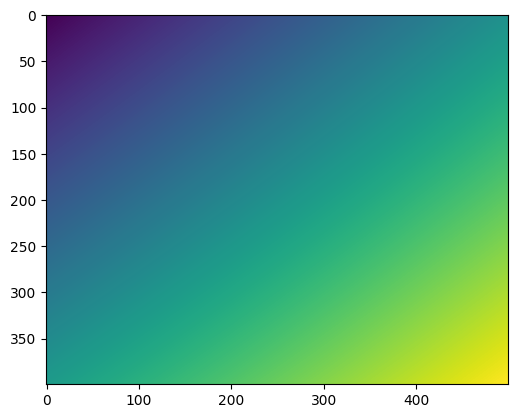

In [14]:
plt.imshow(model.evaluate(X=X, Y=Y))

In [15]:
model.posteriors.mean

array([ 1.35914202,  0.45894262,  2.49175059, -0.02362737])

The order of operations here will matter

In [16]:
model.equation

'\\[f(\\mathbf{Y}, \\mathbf{X}) = w_{0}  + w_{1} \\mathbf{X}^{1} + w_{2} \\mathbf{Y}^{1} + w_{3} \\mathbf{Y}^{1}\\mathbf{X}^{1}\\]'